In [2]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [5]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v5.3.2_remission_rate_changes/ciff_sam/2022_01_28_17_10_48/count_data/'

In [6]:
figname = 'model_5.3.2'

In [7]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

In [8]:
births = pd.read_csv(output_dir +'births.csv').drop(columns='Unnamed: 0')
birth_count = births.loc[births.measure=='total_births']
bw_sum = births.loc[births.measure=='birth_weight_sum']
lbw_sum = births.loc[births.measure=='low_weight_births']
birth_count.head()

,sex,year,measure,input_draw,scenario,value,insecticide_treated_nets,maternal_supplementation,maternal_malnutrition
1536,female,2022,total_births,29,baseline,0.0,covered,bep,cat2
1537,female,2022,total_births,29,baseline,0.0,uncovered,bep,cat2
1538,female,2022,total_births,29,baseline,0.0,covered,mmn,cat2
1539,female,2022,total_births,29,baseline,0.0,uncovered,mmn,cat2
1540,female,2022,total_births,29,baseline,1397.0,covered,ifa,cat2


In [29]:
((bw_sum.groupby(['input_draw','scenario','sex']).sum()/birth_count.groupby(['input_draw','scenario','sex']).sum())
 .groupby(['scenario','sex']).describe())[['value']]

value                                       \
                           count         mean        std          min   
scenario            sex                                                 
baseline            female  12.0  3277.620761  37.600858  3211.321671   
                    male    12.0  3131.003249  25.148074  3085.167546   
lbwsg_interventions female  12.0  3315.383256  38.565459  3241.268609   
                    male    12.0  3168.803288  25.647462  3128.517296   
sqlns               female  12.0  3277.620761  37.600858  3211.321671   
                    male    12.0  3131.003249  25.148074  3085.167546   
wasting_treatment   female  12.0  3277.620761  37.600858  3211.321671   
                    male    12.0  3131.003249  25.148074  3085.167546   

                                                                                
                                    25%          50%          75%          max  
scenario            sex                                                         
baseline            female  3243.756913  3286.250924  3300.267622  3338.934309  
                    male    3110.234661  3134.789584  3152.404530  3164.830709  
lbwsg_interventions female  3288.216947  3317.180191  3338.801512  3374.703141  
                    male    3149.301968  3169.605629  3185.897025  3210.520818  
sqlns               female  3243.756913  3286.250924  3300.267622  3338.934309  
                    male    3110.234661  3134.789584  3152.404530  3164.830709  
wasting_treatment   female  3243.756913  3286.250924  3300.267622  3338.934309  
                    male    3110.234661  3134.789584  3152.404530  3164.830709

In [32]:
(lbw_sum.groupby(['scenario','sex']).sum()/birth_count.groupby(['scenario','sex']).sum())[['value']]

value
scenario            sex             
baseline            female  0.088471
                    male    0.125900
lbwsg_interventions female  0.082575
                    male    0.117681
sqlns               female  0.088471
                    male    0.125900
wasting_treatment   female  0.088471
                    male    0.125900

# Intervention coverage

## maternal supplementation coverage

In [11]:
# check coverage
 
c = birth_count.groupby(['input_draw','scenario','year','maternal_supplementation']).sum()
ca = birth_count.groupby(['input_draw','scenario','year']).sum()
cr = (c / ca).groupby(['scenario','year','maternal_supplementation']).describe(percentiles=[0.025,0.975])
cr

value                      \
                                                count      mean       std   
scenario          year maternal_supplementation                             
baseline          2022 bep                       12.0  0.000000  0.000000   
                       ifa                       12.0  0.593539  0.008851   
                       mmn                       12.0  0.000000  0.000000   
                       uncovered                 12.0  0.406461  0.008851   
                  2023 bep                       12.0  0.000000  0.000000   
...                                               ...       ...       ...   
wasting_treatment 2025 uncovered                 12.0  0.406932  0.009676   
                  2026 bep                       12.0  0.000000  0.000000   
                       ifa                       12.0  0.594520  0.010508   
                       mmn                       12.0  0.000000  0.000000   
                       uncovered                 12.0  0.405480  0.010508   

                                                                               \
                                                      min      2.5%       50%   
scenario          year maternal_supplementation                                 
baseline          2022 bep                       0.000000  0.000000  0.000000   
                       ifa                       0.580359  0.580841  0.594205   
                       mmn                       0.000000  0.000000  0.000000   
                       uncovered                 0.394282  0.394743  0.405795   
                  2023 bep                       0.000000  0.000000  0.000000   
...                                                   ...       ...       ...   
wasting_treatment 2025 uncovered                 0.393231  0.394405  0.405330   
                  2026 bep                       0.000000  0.000000  0.000000   
                       ifa                       0.574536  0.576099  0.596300   
                       mmn                       0.000000  0.000000  0.000000   
                       uncovered                 0.391872  0.392749  0.403700   

                                                                     
                                                    97.5%       max  
scenario          year maternal_supplementation                      
baseline          2022 bep                       0.000000  0.000000  
                       ifa                       0.605257  0.605718  
                       mmn                       0.000000  0.000000  
                       uncovered                 0.419159  0.419641  
                  2023 bep                       0.000000  0.000000  
...                                                   ...       ...  
wasting_treatment 2025 uncovered                 0.424320  0.427202  
                  2026 bep                       0.000000  0.000000  
                       ifa                       0.607251  0.608128  
                       mmn                       0.000000  0.000000  
                       uncovered                 0.423901  0.425464  

[80 rows x 8 columns]

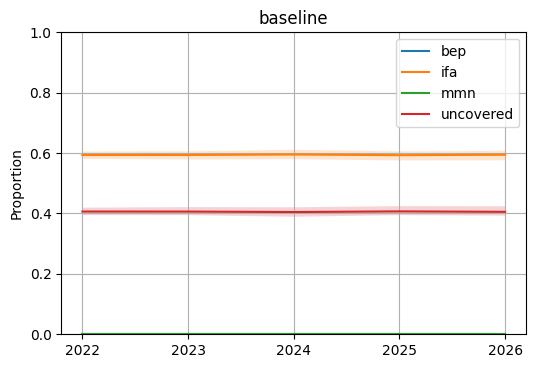

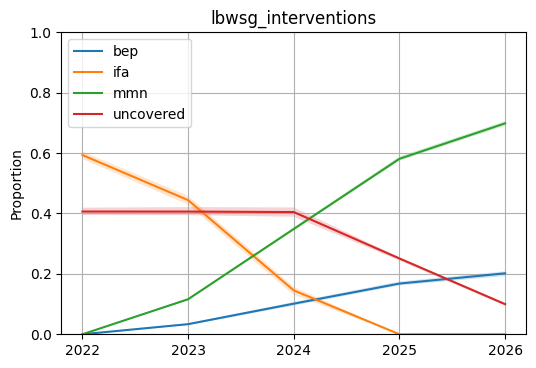

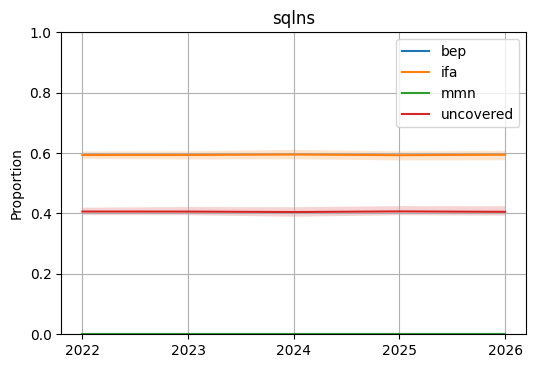

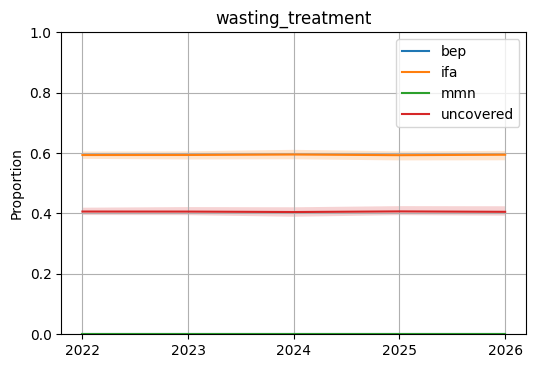

In [12]:
for scenario in cr.reset_index().scenario.unique():
    plt.figure(dpi=100)
    for regimen in cr.reset_index().maternal_supplementation.unique():
        p = cr.reset_index()
        p = p.loc[p.scenario==scenario]
        p = p.loc[p.maternal_supplementation==regimen]
        plt.plot(p.year, p['value','mean'], label=regimen)
        plt.fill_between(p.year, p['value','2.5%'], p['value','97.5%'], alpha=0.2)
    plt.legend()
    plt.ylim(0,1)
    plt.title(f'{scenario}')
    plt.ylabel('Proportion')
    plt.xticks(p.year.unique())
    plt.grid()
    
# conclusion:

    # looks as expected... baseline IFA coverage decreases before baseline uncovered
    # expected target rate
    # wiggles in lines are due to date cut off subtleties
    # should make this into a bar chart or something if we actually want to present these figures

## ITN coverage

In [13]:
# check coverage
c = birth_count.groupby(['input_draw','scenario','year','insecticide_treated_nets']).sum()
ca = birth_count.groupby(['input_draw','scenario','year']).sum()
cr = (c / ca).groupby(['scenario','year','insecticide_treated_nets']).describe(percentiles=[0.025,0.975])
cr

value                      \
                                                  count      mean       std   
scenario            year insecticide_treated_nets                             
baseline            2022 covered                   12.0  0.264620  0.013252   
                         uncovered                 12.0  0.735380  0.013252   
                    2023 covered                   12.0  0.265043  0.011564   
                         uncovered                 12.0  0.734957  0.011564   
                    2024 covered                   12.0  0.265161  0.010697   
                         uncovered                 12.0  0.734839  0.010697   
                    2025 covered                   12.0  0.264610  0.011432   
                         uncovered                 12.0  0.735390  0.011432   
                    2026 covered                   12.0  0.264943  0.011569   
                         uncovered                 12.0  0.735057  0.011569   
lbwsg_interventions 2022 covered                   12.0  0.540717  0.002974   
                         uncovered                 12.0  0.459283  0.002974   
                    2023 covered                   12.0  0.540603  0.002644   
                         uncovered                 12.0  0.459397  0.002644   
                    2024 covered                   12.0  0.540274  0.003939   
                         uncovered                 12.0  0.459726  0.003939   
                    2025 covered                   12.0  0.538604  0.003964   
                         uncovered                 12.0  0.461396  0.003964   
                    2026 covered                   12.0  0.539491  0.003451   
                         uncovered                 12.0  0.460509  0.003451   
sqlns               2022 covered                   12.0  0.264620  0.013252   
                         uncovered                 12.0  0.735380  0.013252   
                    2023 covered                   12.0  0.265043  0.011564   
                         uncovered                 12.0  0.734957  0.011564   
                    2024 covered                   12.0  0.265161  0.010697   
                         uncovered                 12.0  0.734839  0.010697   
                    2025 covered                   12.0  0.264610  0.011432   
                         uncovered                 12.0  0.735390  0.011432   
                    2026 covered                   12.0  0.264943  0.011569   
                         uncovered                 12.0  0.735057  0.011569   
wasting_treatment   2022 covered                   12.0  0.264620  0.013252   
                         uncovered                 12.0  0.735380  0.013252   
                    2023 covered                   12.0  0.265043  0.011564   
                         uncovered                 12.0  0.734957  0.011564   
                    2024 covered                   12.0  0.265161  0.010697   
                         uncovered                 12.0  0.734839  0.010697   
                    2025 covered                   12.0  0.264610  0.011432   
                         uncovered                 12.0  0.735390  0.011432   
                    2026 covered                   12.0  0.264943  0.011569   
                         uncovered                 12.0  0.735057  0.011569   

                                                                       \
                                                        min      2.5%   
scenario            year insecticide_treated_nets                       
baseline            2022 covered                   0.243237  0.244721   
                         uncovered                 0.715675  0.716695   
                    2023 covered                   0.241886  0.244540   
                         uncovered                 0.717085  0.719289   
                    2024 covered                   0.242093  0.245495   
                         uncovered                 0.721998  0.72249

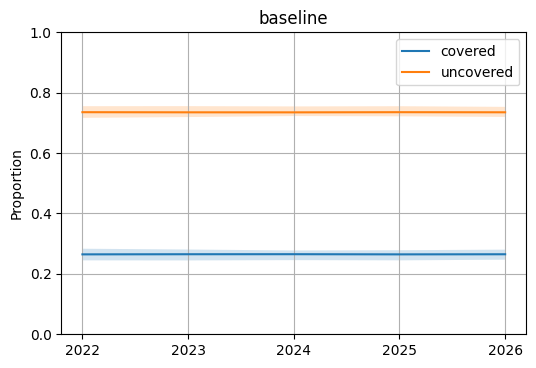

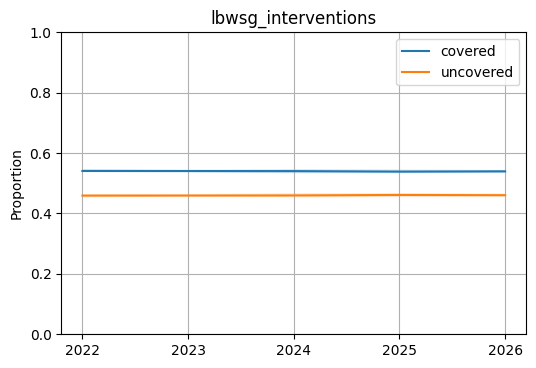

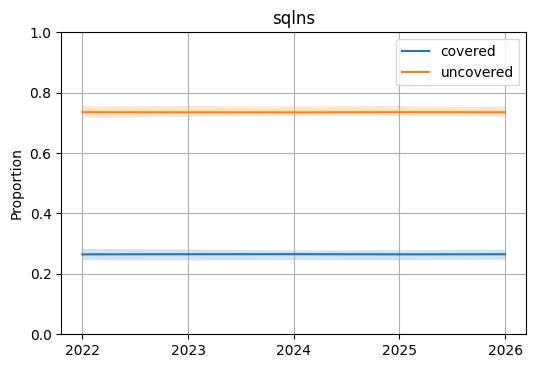

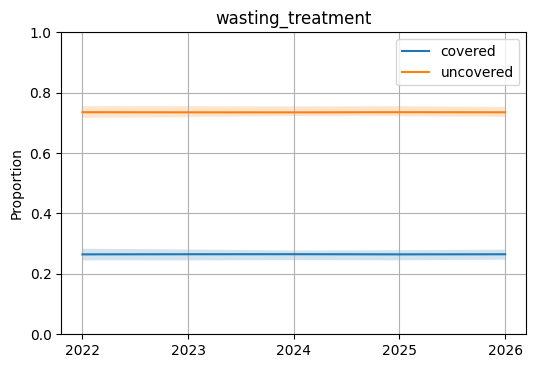

In [14]:
for scenario in cr.reset_index().scenario.unique():
    plt.figure(dpi=100)
    for regimen in cr.reset_index().insecticide_treated_nets.unique():
        p = cr.reset_index()
        p = p.loc[p.scenario==scenario]
        p = p.loc[p.insecticide_treated_nets==regimen]
        plt.plot(p.year, p['value','mean'], label=regimen)
        plt.fill_between(p.year, p['value','2.5%'], p['value','97.5%'], alpha=0.2)
    plt.legend()
    plt.ylim(0,1)
    plt.title(f'{scenario}')
    plt.ylabel('Proportion')
    plt.xticks(p.year.unique())
    plt.grid()
    
# target rates look good, but doesn't appear to go through scale-up

## Look at correlation between ITNs and maternal supplementation

In [15]:
# check coverage
 
c = birth_count.groupby(['input_draw','scenario','insecticide_treated_nets','maternal_supplementation']).sum()
ca = birth_count.groupby(['input_draw','scenario','insecticide_treated_nets']).sum()
cr = ((c / ca).groupby(['scenario','maternal_supplementation','insecticide_treated_nets'])
      .describe(percentiles=[0.025,0.975])
      .reset_index()
     .drop(columns='year'))
cr.loc[cr.scenario.isin(['baseline','lbwsg_interventions'])]

# looks as expected!

/ihme/code/alibow/miniconda/envs/ciff_sam_38/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


scenario maternal_supplementation insecticide_treated_nets  \
                                                                            
0              baseline                      bep                  covered   
1              baseline                      bep                uncovered   
2              baseline                      ifa                  covered   
3              baseline                      ifa                uncovered   
4              baseline                      mmn                  covered   
5              baseline                      mmn                uncovered   
6              baseline                uncovered                  covered   
7              baseline                uncovered                uncovered   
8   lbwsg_interventions                      bep                  covered   
9   lbwsg_interventions                      bep                uncovered   
10  lbwsg_interventions                      ifa                  covered   
11  lbwsg_interventions                      ifa                uncovered   
12  lbwsg_interventions                      mmn                  covered   
13  lbwsg_interventions                      mmn                uncovered   
14  lbwsg_interventions                uncovered                  covered   
15  lbwsg_interventions                uncovered                uncovered   

   value                                                                        
   count      mean       std       min      2.5%       50%     97.5%       max  
0   12.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1   12.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2   12.0  0.593451  0.010211  0.574046  0.576386  0.595576  0.608159  0.609979  
3   12.0  0.594188  0.009068  0.577024  0.579285  0.596295  0.605908  0.606995  
4   12.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
5   12.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
6   12.0  0.406549  0.010211  0.390021  0.391841  0.404424  0.423614  0.425954  
7   12.0  0.405812  0.009068  0.393005  0.394092  0.403705  0.420715  0.422976  
8   12.0  0.100739  0.002445  0.096568  0.096826  0.100922  0.104400  0.104737  
9   12.0  0.101244  0.002183  0.098387  0.098592  0.100997  0.104161  0.104202  
10  12.0  0.236480  0.005936  0.226551  0.227634  0.238733  0.243046  0.243449  
11  12.0  0.236232  0.004969  0.227754  0.228734  0.235326  0.243520  0.244159  
12  12.0  0.348663  0.002389  0.345882  0.346054  0.347765  0.353398  0.354158  
13  12.0  0.349482  0.002938  0.344700  0.344764  0.350538  0.353180  0.353261  
14  12.0  0.314118  0.005902  0.307546  0.307698  0.312662  0.324751  0.326059  
15  12.0  0.313042  0.005326  0.301932  0.303682  0.313917  0.320325  0.320820

In [16]:
# now check the reverse
 
c = birth_count.groupby(['input_draw','scenario','maternal_supplementation','insecticide_treated_nets']).sum()
ca = birth_count.groupby(['input_draw','scenario','maternal_supplementation']).sum()
cr = ((c / ca).groupby(['scenario','insecticide_treated_nets','maternal_supplementation'])
      .describe(percentiles=[0.025,0.975])
      .reset_index()
     .drop(columns='year'))
cr.loc[cr.scenario.isin(['baseline','lbwsg_interventions'])].dropna()

# looks as expected

/ihme/code/alibow/miniconda/envs/ciff_sam_38/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


scenario insecticide_treated_nets maternal_supplementation  \
                                                                            
1              baseline                  covered                      ifa   
3              baseline                  covered                uncovered   
5              baseline                uncovered                      ifa   
7              baseline                uncovered                uncovered   
8   lbwsg_interventions                  covered                      bep   
9   lbwsg_interventions                  covered                      ifa   
10  lbwsg_interventions                  covered                      mmn   
11  lbwsg_interventions                  covered                uncovered   
12  lbwsg_interventions                uncovered                      bep   
13  lbwsg_interventions                uncovered                      ifa   
14  lbwsg_interventions                uncovered                      mmn   
15  lbwsg_interventions                uncovered                uncovered   

   value                                                                        
   count      mean       std       min      2.5%       50%     97.5%       max  
1   12.0  0.264635  0.011763  0.242741  0.244838  0.265534  0.279430  0.280639  
3   12.0  0.265203  0.010954  0.243367  0.246265  0.265075  0.279157  0.279914  
5   12.0  0.735365  0.011763  0.719361  0.720570  0.734466  0.755162  0.757259  
7   12.0  0.734797  0.010954  0.720086  0.720843  0.734925  0.753735  0.756633  
8   12.0  0.538674  0.003937  0.532469  0.532814  0.539507  0.545262  0.545872  
9   12.0  0.540170  0.002959  0.536081  0.536148  0.539965  0.545004  0.545406  
10  12.0  0.539352  0.002259  0.535737  0.535905  0.540269  0.542284  0.542365  
11  12.0  0.540778  0.002680  0.535770  0.536007  0.541218  0.544136  0.544193  
12  12.0  0.461326  0.003937  0.454128  0.454738  0.460493  0.467186  0.467531  
13  12.0  0.459830  0.002959  0.454594  0.454996  0.460035  0.463852  0.463919  
14  12.0  0.460648  0.002259  0.457635  0.457716  0.459731  0.464095  0.464263  
15  12.0  0.459222  0.002680  0.455807  0.455864  0.458782  0.463993  0.464230

## Check that BEP/MMS coverage are logical by maternal malnutrition status

In [17]:
c = birth_count.groupby(['input_draw','scenario','year','maternal_malnutrition','maternal_supplementation']).sum()
ca = birth_count.groupby(['input_draw','scenario','year','maternal_malnutrition']).sum()
cr = (c / ca).reset_index()
assert np.all(cr.loc[(cr.maternal_malnutrition=='cat1')&(cr.maternal_supplementation=='mmn')]['value']==0), 'Malnourished mothers getting MMN'
assert np.all(cr.loc[(cr.maternal_malnutrition=='cat2')&(cr.maternal_supplementation=='bep')]['value']==0), 'Non-malnourished mothers getting BEP'

# Check maternal regimen effects

In [18]:
cols = ['input_draw','scenario','year','maternal_malnutrition','maternal_supplementation']
b = bw_sum.groupby(cols).sum()#.drop(columns='year')
bc = birth_count.groupby(cols).sum()#.drop(columns='year')
bw = (b/bc).groupby([c for c in cols if c != 'input_draw']).describe(percentiles=[0.025,0.975])
bw.dropna().head(10)

value  \
                                                             count   
scenario year maternal_malnutrition maternal_supplementation         
baseline 2022 cat1                  ifa                       12.0   
                                    uncovered                 12.0   
              cat2                  ifa                       12.0   
                                    uncovered                 12.0   
         2023 cat1                  ifa                       12.0   
                                    uncovered                 12.0   
              cat2                  ifa                       12.0   
                                    uncovered                 12.0   
         2024 cat1                  ifa                       12.0   
                                    uncovered                 12.0   

                                                                           \
                                                                     mean   
scenario year maternal_malnutrition maternal_supplementation                
baseline 2022 cat1                  ifa                       3112.962871   
                                    uncovered                 3069.641173   
              cat2                  ifa                       3255.292535   
                                    uncovered                 3202.620007   
         2023 cat1                  ifa                       3117.487998   
                                    uncovered                 3069.152537   
              cat2                  ifa                       3253.326190   
                                    uncovered                 3200.951990   
         2024 cat1                  ifa                       3122.274427   
                                    uncovered                 3060.032659   

                                                                         \
                                                                    std   
scenario year maternal_malnutrition maternal_supplementation              
baseline 2022 cat1                  ifa                       32.230942   
                                    uncovered                 45.540206   
              cat2                  ifa                       26.072655   
                                    uncovered                 29.097318   
         2023 cat1                  ifa                       31.951514   
                                    uncovered                 38.106608   
              cat2                  ifa                       25.599800   
                                    uncovered                 23.658539   
         2024 cat1                  ifa                       31.068654   
                                    uncovered                 32.025785   

                                                                           \
                                                                      min   
scenario year maternal_malnutrition maternal_supplementation                
baseline 2022 cat1                  ifa                       3069.889605   
                                    uncovered                 2985.010269   
              cat2                  ifa                       3202.488956   
                                    uncovered                 3161.575783   
         2023 cat1                  ifa                       3057.082182   
                                    uncovered                 2989.838439   
              cat2                  ifa                       3195.662684   
                                    uncovered                 3169.872492   
         2024 cat1                  ifa                       3069.541974   
                                    uncovered                 2992.398886   

                                                                           \
                                                                     2.5%   
scenario year ma

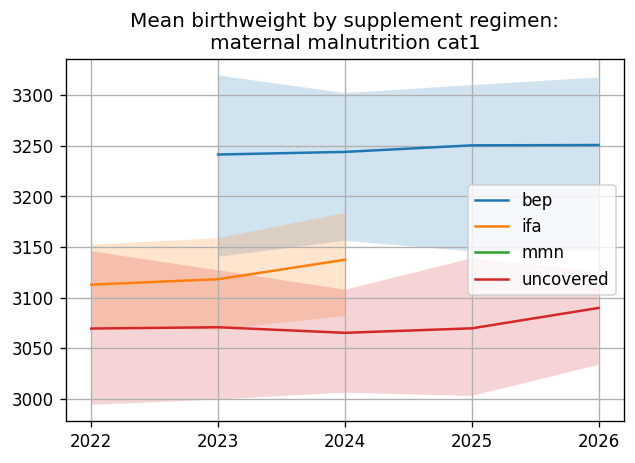

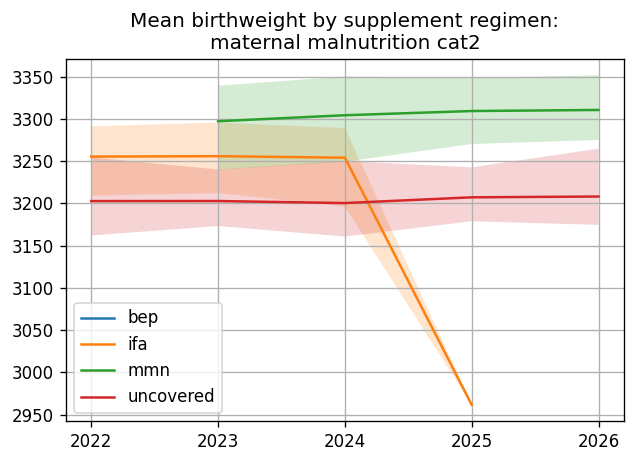

In [19]:
p = bw.reset_index()
p = p.loc[p.scenario=='lbwsg_interventions']
for cat in p.maternal_malnutrition.unique():
    plt.figure(dpi=120)
    for regimen in p.maternal_supplementation.unique():
        pp = p.loc[(p.maternal_malnutrition==cat)&(p.maternal_supplementation==regimen)]
        plt.plot(pp.year, pp['value','mean'], label=regimen)
        plt.fill_between(pp.year, pp['value','2.5%'], pp['value','97.5%'],alpha=.20)
    plt.title(f'Mean birthweight by supplement regimen:\nmaternal malnutrition {cat}')
    plt.legend()
    plt.grid()
    plt.xticks(pp.year.unique())

In [20]:
# obervation in 2025 for ifa looks weird... investigate
birth_count.loc[(birth_count.scenario=='lbwsg_interventions')
               &(birth_count.year==2025)
               &(birth_count.maternal_malnutrition=='cat2')
               &(birth_count.maternal_supplementation=='ifa')
               ]['value'].describe()

# just two births that occur in this strata... 
# don't need to worry about it

count    48.000000
mean      0.041667
std       0.201941
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: value, dtype: float64

In [21]:
cols = ['input_draw','scenario','maternal_malnutrition','maternal_supplementation']
b = bw_sum.groupby(cols).sum().drop(columns='year')
bc = birth_count.groupby(cols).sum().drop(columns='year')
bw = (b/bc).reset_index()
ifa = bw.loc[bw.maternal_supplementation=='ifa'].drop(columns='maternal_supplementation')
mmn = bw.loc[bw.maternal_supplementation=='mmn'].drop(columns='maternal_supplementation')
bep = bw.loc[bw.maternal_supplementation=='bep'].drop(columns='maternal_supplementation')
uncovered = bw.loc[bw.maternal_supplementation=='uncovered'].drop(columns='maternal_supplementation')

ifa_shift = ((ifa.set_index([c for c in ifa.columns if c != 'value']) 
             - uncovered.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))
ifa_shift

# always positive
# target: +57.73 g (7.66 to 107.79)
# looks reasonable

value                        \
                                          count       mean        std   
scenario            maternal_malnutrition                               
baseline            cat1                   12.0  55.314735  28.158532   
                    cat2                   12.0  55.887325  26.934647   
lbwsg_interventions cat1                   12.0  47.805706  31.083511   
                    cat2                   12.0  52.225635  29.826405   
sqlns               cat1                   12.0  55.314735  28.158532   
                    cat2                   12.0  55.887325  26.934647   
wasting_treatment   cat1                   12.0  55.314735  28.158532   
                    cat2                   12.0  55.887325  26.934647   

                                                                            \
                                                 min       2.5%        50%   
scenario            maternal_malnutrition                                    
baseline            cat1                   17.226804  18.683575  49.023638   
                    cat2                   10.591491  14.513246  53.458124   
lbwsg_interventions cat1                   11.272980  11.793230  43.115093   
                    cat2                    4.219822   7.536637  50.442292   
sqlns               cat1                   17.226804  18.683575  49.023638   
                    cat2                   10.591491  14.513246  53.458124   
wasting_treatment   cat1                   17.226804  18.683575  49.023638   
                    cat2                   10.591491  14.513246  53.458124   

                                                                   
                                                97.5%         max  
scenario            maternal_malnutrition                          
baseline            cat1                   100.882917  102.395613  
                    cat2                    94.203213   95.612743  
lbwsg_interventions cat1                    95.205322   97.476552  
                    cat2                    91.226784   91.904030  
sqlns               cat1                   100.882917  102.395613  
                    cat2                    94.203213   95.612743  
wasting_treatment   cat1                   100.882917  102.395613  
                    cat2                    94.203213   95.612743

In [22]:
# but why was lbwsg/cat1 lower than all the rest??
# let's check the same thing stratified by year this time

cols = ['input_draw','scenario','maternal_malnutrition','year','maternal_supplementation']
b = bw_sum.groupby(cols).sum()
bc = birth_count.groupby(cols).sum()
bw = (b/bc).reset_index()
ifa = bw.loc[bw.maternal_supplementation=='ifa'].drop(columns='maternal_supplementation')
mmn = bw.loc[bw.maternal_supplementation=='mmn'].drop(columns='maternal_supplementation')
bep = bw.loc[bw.maternal_supplementation=='bep'].drop(columns='maternal_supplementation')
uncovered = bw.loc[bw.maternal_supplementation=='uncovered'].drop(columns='maternal_supplementation')

ifa_shift = ((ifa.set_index([c for c in ifa.columns if c != 'value']) 
             - uncovered.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['scenario','year','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))
ifa_shift

# there's a lot of variation by year!
# lower value for lbwsg/cat1 in previous dataframe can be explained by stochastic variation because it is a small strata

value                         \
                                               count        mean        std   
scenario            year maternal_malnutrition                                
baseline            2022 cat1                   12.0   43.321698  38.411103   
                         cat2                   12.0   52.672528  27.857941   
                    2023 cat1                   12.0   48.335461  32.377042   
                         cat2                   12.0   52.374201  32.108126   
                    2024 cat1                   12.0   62.241768  30.808155   
                         cat2                   12.0   58.317583  31.011869   
                    2025 cat1                   12.0   62.460885  37.322021   
                         cat2                   12.0   56.364282  26.642372   
                    2026 cat1                   12.0   60.290774  26.400318   
                         cat2                   12.0   59.725284  24.684443   
lbwsg_interventions 2022 cat1                   12.0   43.321698  38.411103   
                         cat2                   12.0   52.672528  27.857941   
                    2023 cat1                   12.0   47.424682  35.189498   
                         cat2                   12.0   53.083713  31.340758   
                    2024 cat1                   12.0   72.155371  30.225311   
                         cat2                   12.0   53.662726  37.897477   
                    2025 cat1                    0.0         NaN        NaN   
                         cat2                    1.0 -220.759320        NaN   
                    2026 cat1                    0.0         NaN        NaN   
                         cat2                    0.0         NaN        NaN   
sqlns               2022 cat1                   12.0   43.321698  38.411103   
                         cat2                   12.0   52.672528  27.857941   
                    2023 cat1                   12.0   48.335461  32.377042   
                         cat2                   12.0   52.374201  32.108126   
                    2024 cat1                   12.0   62.241768  30.808155   
                         cat2                   12.0   58.317583  31.011869   
                    2025 cat1                   12.0   62.460885  37.322021   
                         cat2                   12.0   56.364282  26.642372   
                    2026 cat1                   12.0   60.290774  26.400318   
                         cat2                   12.0   59.725284  24.684443   
wasting_treatment   2022 cat1                   12.0   43.321698  38.411103   
                         cat2                   12.0   52.672528  27.857941   
                    2023 cat1                   12.0   48.335461  32.377042   
                         cat2                   12.0   52.374201  32.108126   
                    2024 cat1                   12.0   62.241768  30.808155   
                         cat2                   12.0   58.317583  31.011869   
                    2025 cat1                   12.0   62.460885  37.322021   
                         cat2                   12.0   56.364282  26.642372   
                    2026 cat1                   12.0   60.290774  26.400318   
                         cat2                   12.0   59.725284  24.684443   

                                                                        \
                                                       min        2.5%   
scenario            year maternal_malnutrition                           
baseline            2022 cat1                    -7.185889   -5.861401   
                         cat2                     5.023421   10.633886   
                    2023 cat1                    -3.158604    0.311957   
                         cat2                     1.566926    3.534750   
                    2024 cat1                    13.749171   14.796922   
                         cat2                    12.14878

In [23]:
mmn_shift = ((mmn.set_index([c for c in ifa.columns if c != 'value']) 
             - ifa.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))


# always positive
# target: +45.16 (32.31 to 58.02)
# looks a little high...
mmn_shift

value                        \
                                          count       mean        std   
scenario            maternal_malnutrition                               
baseline            cat1                    0.0        NaN        NaN   
                    cat2                    0.0        NaN        NaN   
lbwsg_interventions cat1                    0.0        NaN        NaN   
                    cat2                   25.0  57.244948  58.734788   
sqlns               cat1                    0.0        NaN        NaN   
                    cat2                    0.0        NaN        NaN   
wasting_treatment   cat1                    0.0        NaN        NaN   
                    cat2                    0.0        NaN        NaN   

                                                                            \
                                                 min       2.5%        50%   
scenario            maternal_malnutrition                                    
baseline            cat1                         NaN        NaN        NaN   
                    cat2                         NaN        NaN        NaN   
lbwsg_interventions cat1                         NaN        NaN        NaN   
                    cat2                   16.517858  18.852385  49.086295   
sqlns               cat1                         NaN        NaN        NaN   
                    cat2                         NaN        NaN        NaN   
wasting_treatment   cat1                         NaN        NaN        NaN   
                    cat2                         NaN        NaN        NaN   

                                                                   
                                                97.5%         max  
scenario            maternal_malnutrition                          
baseline            cat1                          NaN         NaN  
                    cat2                          NaN         NaN  
lbwsg_interventions cat1                          NaN         NaN  
                    cat2                   178.942566  331.559834  
sqlns               cat1                          NaN         NaN  
                    cat2                          NaN         NaN  
wasting_treatment   cat1                          NaN         NaN  
                    cat2                          NaN         NaN

In [24]:
bep_shift = ((bep.set_index([c for c in ifa.columns if c != 'value']) 
             - ifa.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))

bep_shift
# always positive
# target: +45.16 (32.31 to 58.02) +66.96g (13.13 to 120.78) =~ 111
# looks reasonable

value                         \
                                          count        mean        std   
scenario            maternal_malnutrition                                
baseline            cat1                    0.0         NaN        NaN   
                    cat2                    0.0         NaN        NaN   
lbwsg_interventions cat1                   24.0  114.782175  40.484817   
                    cat2                    0.0         NaN        NaN   
sqlns               cat1                    0.0         NaN        NaN   
                    cat2                    0.0         NaN        NaN   
wasting_treatment   cat1                    0.0         NaN        NaN   
                    cat2                    0.0         NaN        NaN   

                                                                            \
                                                min       2.5%         50%   
scenario            maternal_malnutrition                                    
baseline            cat1                        NaN        NaN         NaN   
                    cat2                        NaN        NaN         NaN   
lbwsg_interventions cat1                   2.381621  22.968696  114.077607   
                    cat2                        NaN        NaN         NaN   
sqlns               cat1                        NaN        NaN         NaN   
                    cat2                        NaN        NaN         NaN   
wasting_treatment   cat1                        NaN        NaN         NaN   
                    cat2                        NaN        NaN         NaN   

                                                                   
                                                97.5%         max  
scenario            maternal_malnutrition                          
baseline            cat1                          NaN         NaN  
                    cat2                          NaN         NaN  
lbwsg_interventions cat1                   172.096885  179.264466  
                    cat2                          NaN         NaN  
sqlns               cat1                          NaN         NaN  
                    cat2                          NaN         NaN  
wasting_treatment   cat1                          NaN         NaN  
                    cat2                          NaN         NaN

## check ITN effect size

In [25]:
cols = ['input_draw','scenario','year','insecticide_treated_nets']
b = bw_sum.groupby(cols).sum()#.drop(columns='year')
bc = birth_count.groupby(cols).sum()#.drop(columns='year')
bw = (b/bc).groupby([c for c in cols if c != 'input_draw']).describe(percentiles=[0.025,0.975])
bw.dropna().head(10)

value                          \
                                       count         mean        std   
scenario year insecticide_treated_nets                                 
baseline 2022 covered                   12.0  3233.792094  30.078392   
              uncovered                 12.0  3192.039976  26.350015   
         2023 covered                   12.0  3229.061694  28.263166   
              uncovered                 12.0  3192.445177  22.655341   
         2024 covered                   12.0  3231.403026  30.247668   
              uncovered                 12.0  3188.601446  26.328525   
         2025 covered                   12.0  3231.419859  23.049477   
              uncovered                 12.0  3192.757680  23.703963   
         2026 covered                   12.0  3237.158979  27.012321   
              uncovered                 12.0  3191.298454  25.195945   

                                                                               \
                                                min         2.5%          50%   
scenario year insecticide_treated_nets                                          
baseline 2022 covered                   3191.778691  3194.701959  3232.448925   
              uncovered                 3134.856668  3143.960011  3194.600537   
         2023 covered                   3194.337788  3196.381453  3224.854562   
              uncovered                 3146.856944  3154.360978  3190.765692   
         2024 covered                   3189.740285  3193.650888  3225.639357   
              uncovered                 3123.968348  3137.180713  3188.233719   
         2025 covered                   3196.501481  3199.578281  3225.241539   
              uncovered                 3143.796687  3150.262325  3191.664160   
         2026 covered                   3202.278292  3203.879112  3233.374942   
              uncovered                 3142.663674  3149.547799  3186.017252   

                                                                  
                                              97.5%          max  
scenario year insecticide_treated_nets                            
baseline 2022 covered                   3285.535863  3288.112584  
              uncovered                 3230.867458  3236.970626  
         2023 covered                   3270.434413  3270.941564  
              uncovered                 3230.749825  3237.521349  
         2024 covered                   3280.205098  3282.023230  
              uncovered                 3226.874220  3233.370022  
         2025 covered                   3269.820170  3271.863343  
              uncovered                 3229.086285  3235.481355  
         2026 covered                   3281.776281  3282.144787  
              uncovered                 3230.380670  3233.847084

In [26]:
cols = ['input_draw','scenario','insecticide_treated_nets']
b = bw_sum.groupby(cols).sum().drop(columns='year')
bc = birth_count.groupby(cols).sum().drop(columns='year')
bw = (b/bc).reset_index()
covered = bw.loc[bw.insecticide_treated_nets=='covered'].drop(columns='insecticide_treated_nets')
uncovered = bw.loc[bw.insecticide_treated_nets=='uncovered'].drop(columns='insecticide_treated_nets')

itn_shift = ((covered.set_index([c for c in covered.columns if c != 'value']) 
             - uncovered.set_index([c for c in covered.columns if c != 'value']))
              .groupby(['scenario']).describe(percentiles=[0.025,0.975]))
itn_shift

# shift is smaller in intervention scenario, 
# likely because uncovered BW is higher in intervention scenario due to maternal supplementation coverage

value                                            \
                    count       mean        std       min      2.5%   
scenario                                                              
baseline             12.0  41.140035  27.780394  2.555221  6.372166   
lbwsg_interventions  12.0  29.518480  19.831440  6.054887  6.671116   
sqlns                12.0  41.140035  27.780394  2.555221  6.372166   
wasting_treatment    12.0  41.140035  27.780394  2.555221  6.372166   

                                                      
                           50%      97.5%        max  
scenario                                              
baseline             33.695611  92.189804  94.589078  
lbwsg_interventions  25.424803  65.074746  66.184017  
sqlns                33.695611  92.189804  94.589078  
wasting_treatment    33.695611  92.189804  94.589078

In [27]:
cols = ['input_draw','scenario','year','insecticide_treated_nets']
b = bw_sum.groupby(cols).sum()#.drop(columns='year')
bc = birth_count.groupby(cols).sum()#.drop(columns='year')
bw = (b/bc).reset_index()
covered = bw.loc[bw.insecticide_treated_nets=='covered'].drop(columns='insecticide_treated_nets')
uncovered = bw.loc[bw.insecticide_treated_nets=='uncovered'].drop(columns='insecticide_treated_nets')

itn_shift = ((covered.set_index([c for c in covered.columns if c != 'value']) 
             - uncovered.set_index([c for c in covered.columns if c != 'value']))
              .groupby(['scenario','year']).describe(percentiles=[0.025,0.975]))
itn_shift

# shift is smaller in intervention scenario, 
# likely because uncovered BW is higher in intervention scenario due to maternal supplementation coverage

value                                              \
                         count       mean        std        min       2.5%   
scenario            year                                                     
baseline            2022  12.0  41.752118  28.846926  10.507027  10.990835   
                    2023  12.0  36.616517  30.144704   0.377396   1.654074   
                    2024  12.0  42.801580  31.101890  -1.089452   0.186525   
                    2025  12.0  38.662179  30.048919 -12.706178  -6.419582   
                    2026  12.0  45.860525  24.866475  14.631207  17.194995   
lbwsg_interventions 2022  12.0  14.488446  14.178701  -2.751789  -1.757325   
                    2023  12.0  24.809935  15.546936   5.040319   5.048907   
                    2024  12.0  31.527910  19.915047   4.934077   6.212849   
                    2025  12.0  36.638185  25.380861  -0.004601   2.994391   
                    2026  12.0  40.514123  28.980233   7.777763   8.625198   
sqlns               2022  12.0  41.752118  28.846926  10.507027  10.990835   
                    2023  12.0  36.616517  30.144704   0.377396   1.654074   
                    2024  12.0  42.801580  31.101890  -1.089452   0.186525   
                    2025  12.0  38.662179  30.048919 -12.706178  -6.419582   
                    2026  12.0  45.860525  24.866475  14.631207  17.194995   
wasting_treatment   2022  12.0  41.752118  28.846926  10.507027  10.990835   
                    2023  12.0  36.616517  30.144704   0.377396   1.654074   
                    2024  12.0  42.801580  31.101890  -1.089452   0.186525   
                    2025  12.0  38.662179  30.048919 -12.706178  -6.419582   
                    2026  12.0  45.860525  24.866475  14.631207  17.194995   

                                                           
                                50%      97.5%        max  
scenario            year                                   
baseline            2022  36.128581  92.180127  92.906882  
                    2023  29.521605  87.729771  94.559311  
                    2024  44.229478  95.971453  96.986002  
                    2025  35.583856  92.167432  92.619589  
                    2026  38.520842  94.563057  99.668837  
lbwsg_interventions 2022   7.815771  39.825885  42.675060  
                    2023  26.366703  49.311300  50.591596  
                    2024  31.096976  68.704159  71.325536  
                    2025  29.994322  79.811780  80.122113  
                    2026  33.003984  90.576009  92.728454  
sqlns               2022  36.128581  92.180127  92.906882  
                    2023  29.521605  87.729771  94.559311  
                    2024  44.229478  95.971453  96.986002  
                    2025  35.583856  92.167432  92.619589  
                    2026  38.520842  94.563057  99.668837  
wasting_treatment   2022  36.128581  92.180127  92.906882  
                    2023  29.521605  87.729771  94.559311  
                    2024  44.229478  95.971453  96.986002  
                    2025  35.583856  92.167432  92.619589  
                    2026  38.520842  94.563057  99.668837

In [28]:
# let's test that theory by stratifying by maternal supplementation regimen

cols = ['input_draw','scenario','maternal_supplementation','insecticide_treated_nets']
b = bw_sum.groupby(cols).sum().drop(columns='year')
bc = birth_count.groupby(cols).sum().drop(columns='year')
bw = (b/bc).reset_index()
covered = bw.loc[bw.insecticide_treated_nets=='covered'].drop(columns='insecticide_treated_nets')
uncovered = bw.loc[bw.insecticide_treated_nets=='uncovered'].drop(columns='insecticide_treated_nets')

itn_shift = ((covered.set_index([c for c in covered.columns if c != 'value']) 
             - uncovered.set_index([c for c in covered.columns if c != 'value']))
              .groupby(['scenario','maternal_supplementation']).describe(percentiles=[0.025,0.975]))
itn_shift.dropna()

# hmm... trend is still there even for uncovered by maternal supplementation group
# maybe something weird is going on... maybe effects of supplementation and ITNs are being muddled together?

value                        \
                                             count       mean        std   
scenario            maternal_supplementation                               
baseline            ifa                       12.0  40.899889  29.298668   
                    uncovered                 12.0  41.610970  25.951933   
lbwsg_interventions bep                       12.0  34.923824  36.045332   
                    ifa                       12.0  20.052443  14.466691   
                    mmn                       12.0  36.956229  24.211878   
                    uncovered                 12.0  27.033887  19.130856   
sqlns               ifa                       12.0  40.899889  29.298668   
                    uncovered                 12.0  41.610970  25.951933   
wasting_treatment   ifa                       12.0  40.899889  29.298668   
                    uncovered                 12.0  41.610970  25.951933   

                                                                               \
                                                    min       2.5%        50%   
scenario            maternal_supplementation                                    
baseline            ifa                       -0.258733   4.245689  33.353169   
                    uncovered                  6.206208   9.203853  33.963438   
lbwsg_interventions bep                      -28.633268 -19.964789  22.702690   
                    ifa                        3.311563   3.720836  17.304021   
                    mmn                       10.905587  11.146445  35.897282   
                    uncovered                  1.774312   3.625901  23.481582   
sqlns               ifa                       -0.258733   4.245689  33.353169   
                    uncovered                  6.206208   9.203853  33.963438   
wasting_treatment   ifa                       -0.258733   4.245689  33.353169   
                    uncovered                  6.206208   9.203853  33.963438   

                                                                    
                                                  97.5%        max  
scenario            maternal_supplementation                        
baseline            ifa                       95.246946  98.364573  
                    uncovered                 88.347234  89.871889  
lbwsg_interventions bep                       88.725230  93.720503  
                    ifa                       43.155892  43.452883  
                    mmn                       78.353903  79.846320  
                    uncovered                 62.251435  64.479823  
sqlns               ifa                       95.246946  98.364573  
                    uncovered                 88.347234  89.871889  
wasting_treatment   ifa                       95.246946  98.364573  
                    uncovered                 88.347234  89.871889